In [16]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

### Team level statistics to consider
- Average score for each team
- Count of each tag for each team 
- 'Efficiency rating' that compares number of tags to word count (i.e.  1000 words with 10 tags is rated lower than 100 words with 10 tags)
- Look at each team individually 
- Try to predict average score based on each teams tags
- Classify based on score and then use decision trees? 

In [2]:
df = pd.read_csv('virtualInternshipData_ADS2001.csv', encoding = 'unicode_escape')

df.head()

,Unnamed: 0,userIDs,implementation,Line_ID,ChatGroup,content,group_id,RoleName,roomName,m_experimental_testing,m_making_design_choices,m_asking_questions,j_customer_consultants_requests,j_performance_parameters_requirements,j_communication,OutcomeScore,wordCount
0,1,1,a,1,PRNLT,Hello team. Welcome to Nephrotex!,2,Mentor,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,4,5
1,2,1,a,2,PRNLT,I'm Maria Williams. I'll be your design adviso...,2,Mentor,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,4,11
2,3,1,a,3,PRNLT,I'm here to help if you have any questions.,2,Mentor,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,4,9
3,4,1,a,4,PRNLT,Please introduce yourselves with the name you ...,2,Mentor,Introduction and Workflow Tutorial with Entran...,0,0,0,1,0,0,4,51
4,5,1,a,5,PRNLT,I just want to make sure everyone has found th...,2,Mentor,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,4,39


Find the different groups in the dataset

In [3]:
df['group_id'].unique()

array([2, 3, 4, 5, 6], dtype=int64)

Split groups into their own seperate dataframes

In [43]:
group2 = df[df['group_id'] == 2]
group3 = df[df['group_id'] == 3]
group4 = df[df['group_id'] == 4]
group5 = df[df['group_id'] == 5]
group6 = df[df['group_id'] == 6]

group2.head()

,Unnamed: 0,userIDs,implementation,Line_ID,ChatGroup,content,group_id,RoleName,roomName,m_experimental_testing,m_making_design_choices,m_asking_questions,j_customer_consultants_requests,j_performance_parameters_requirements,j_communication,OutcomeScore,wordCount
0,1,1,a,1,PRNLT,Hello team. Welcome to Nephrotex!,2,Mentor,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,4,5
1,2,1,a,2,PRNLT,I'm Maria Williams. I'll be your design adviso...,2,Mentor,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,4,11
2,3,1,a,3,PRNLT,I'm here to help if you have any questions.,2,Mentor,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,4,9
3,4,1,a,4,PRNLT,Please introduce yourselves with the name you ...,2,Mentor,Introduction and Workflow Tutorial with Entran...,0,0,0,1,0,0,4,51
4,5,1,a,5,PRNLT,I just want to make sure everyone has found th...,2,Mentor,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,4,39


In [5]:
print("The average score for group 2 is", round(group2['OutcomeScore'].mean(),2))
print("The average score for group 3 is", round(group3['OutcomeScore'].mean(),2))
print("The average score for group 4 is", round(group4['OutcomeScore'].mean(),2))
print("The average score for group 5 is", round(group5['OutcomeScore'].mean(),2))
print("The average score for group 6 is", round(group6['OutcomeScore'].mean(),2))

The average score for group 2 is 3.47
The average score for group 3 is 3.71
The average score for group 4 is 3.8
The average score for group 5 is 4.08
The average score for group 6 is 3.68


In [6]:
tagCount2 = group2.groupby('group_id',axis=0).sum()
tagCount2 = tagCount2.iloc[:,3:9]

tagCount3 = group3.groupby('group_id',axis=0).sum()
tagCount3 = tagCount3.iloc[:,3:9]

tagCount4 = group4.groupby('group_id',axis=0).sum()
tagCount4 = tagCount4.iloc[:,3:9]

tagCount5 = group5.groupby('group_id',axis=0).sum()
tagCount5 = tagCount5.iloc[:,3:9]

tagCount6 = group6.groupby('group_id',axis=0).sum()
tagCount6 = tagCount6.iloc[:,3:9]

tagdf = tagCount2

tagdf = tagdf.append(tagCount3)
tagdf = tagdf.append(tagCount4)
tagdf = tagdf.append(tagCount5)
tagdf = tagdf.append(tagCount6)

tagdf.head()

,m_experimental_testing,m_making_design_choices,m_asking_questions,j_customer_consultants_requests,j_performance_parameters_requirements,j_communication
group_id,,,,,,
2,109,401,743,71,220,86
3,67,382,729,95,190,84
4,161,415,783,64,209,83
5,117,407,660,64,183,74
6,97,368,672,54,200,77


In [7]:
avgScores = [group2['OutcomeScore'].mean(), 
             group3['OutcomeScore'].mean(), 
             group4['OutcomeScore'].mean(),
             group5['OutcomeScore'].mean(),
             group6['OutcomeScore'].mean()]

In [8]:
tagdf['AvgScore'] = avgScores

tagdf.head()

,m_experimental_testing,m_making_design_choices,m_asking_questions,j_customer_consultants_requests,j_performance_parameters_requirements,j_communication,AvgScore
group_id,,,,,,,
2,109,401,743,71,220,86,3.474365
3,67,382,729,95,190,84,3.709736
4,161,415,783,64,209,83,3.802921
5,117,407,660,64,183,74,4.075275
6,97,368,672,54,200,77,3.684165


Investigate the correlation matrix to determine key features

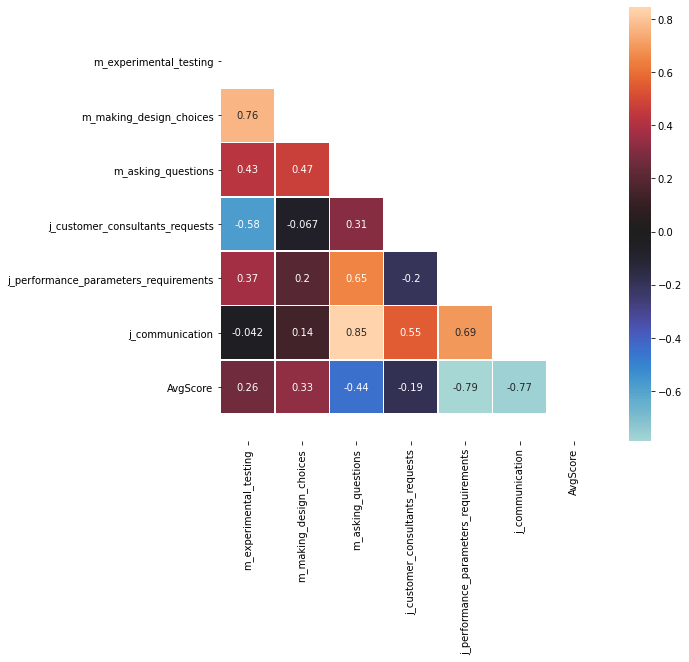

In [9]:
corrs = tagdf.corr() 

mask = np.triu(np.ones_like(corrs, dtype=np.bool)) 
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corrs, mask=mask, center=0, annot=True, square=True, linewidths=.5) 
bottom, top = ax.get_ylim() 
ax.set_ylim(bottom + 0.5, top - 0.5);

From this correlation matrix we can see that the tags that have the most impact on the average score of the members of the group is 'perfromance parameters requirements' and 'communication'.

In [38]:
group2tag = group2.iloc[:,1:16].drop(['implementation','Line_ID','ChatGroup','content','group_id','RoleName','roomName'], axis=1)
group2tag = group2tag.groupby(['userIDs','OutcomeScore'],as_index=False,axis=0).sum()

group3tag = group3.iloc[:,1:16].drop(['implementation','Line_ID','ChatGroup','content','group_id','RoleName','roomName'], axis=1)
group3tag = group3tag.groupby(['userIDs','OutcomeScore'],as_index=False,axis=0).sum()

group4tag = group4.iloc[:,1:16].drop(['implementation','Line_ID','ChatGroup','content','group_id','RoleName','roomName'], axis=1)
group4tag = group4tag.groupby(['userIDs','OutcomeScore'],as_index=False,axis=0).sum()

group5tag = group5.iloc[:,1:16].drop(['implementation','Line_ID','ChatGroup','content','group_id','RoleName','roomName'], axis=1)
group5tag = group5tag.groupby(['userIDs','OutcomeScore'],as_index=False,axis=0).sum()

group6tag = group6.iloc[:,1:16].drop(['implementation','Line_ID','ChatGroup','content','group_id','RoleName','roomName'], axis=1)
group6tag = group6tag.groupby(['userIDs','OutcomeScore'],as_index=False,axis=0).sum()

group2tag

,userIDs,OutcomeScore,m_experimental_testing,m_making_design_choices,m_asking_questions,j_customer_consultants_requests,j_performance_parameters_requirements,j_communication
0,1,4,1,9,10,1,2,6
1,2,4,2,4,17,0,4,0
2,3,4,1,4,3,0,1,0
3,4,4,2,2,3,1,5,0
4,5,2,0,0,6,0,2,0
...,...,...,...,...,...,...,...,...
88,368,2,0,7,10,2,6,1
89,369,3,7,12,11,0,5,4
90,370,2,1,3,2,0,3,0
91,371,2,1,5,10,2,2,1


Here we change the outcome score to a string so that it is treated as a class rather than as a numerical value. Extract the features and target and split the data set. Initialise the decision tree classifier. Plot the decision tree

Decision tree accuracy: 0.421


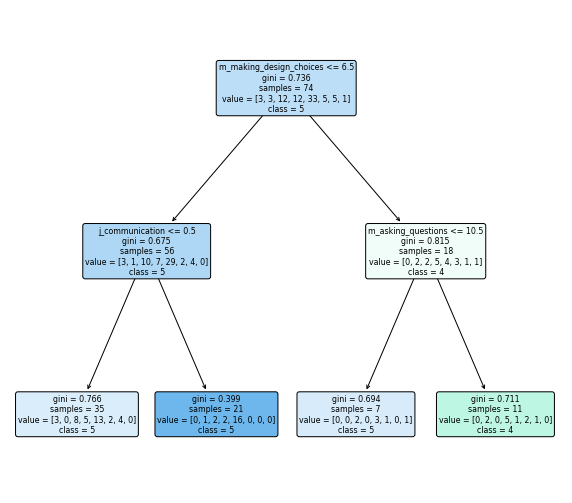

In [39]:
X2 = group2tag.drop(['userIDs','OutcomeScore'],axis=1)
Y2 = group2tag['OutcomeScore']

X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2,Y2, train_size = 0.8, random_state=123)

group2tag_dtc = DecisionTreeClassifier(max_depth=2,random_state=123)
group2tag_dtc = group2tag_dtc.fit(X2_train,Y2_train)

fig, ax = plt.subplots(figsize=(10,9))
plot_tree(group2tag_dtc,
         filled = True,
         rounded = True,
         class_names = ['1','2','3','4','5','6','7','8'],
         feature_names = X2.columns);

Y2_pred = group2tag_dtc.predict(X2_test)
print("Decision tree accuracy:", np.round(accuracy_score(Y2_test,Y2_pred),3))

Test random forest classifier 

In [41]:
for i in [50,100,150,200]:
    clf = RandomForestClassifier(n_estimators=i, random_state=123).fit(X2_train, Y2_train)
    Y2_pred = clf.predict(X2_test)
    print('Accuracy of {} estimators: {}'.format(i,np.round(accuracy_score(Y2_test,Y2_pred),3)))

Accuracy of 50 estimators: 0.158
Accuracy of 100 estimators: 0.211
Accuracy of 150 estimators: 0.158
Accuracy of 200 estimators: 0.211


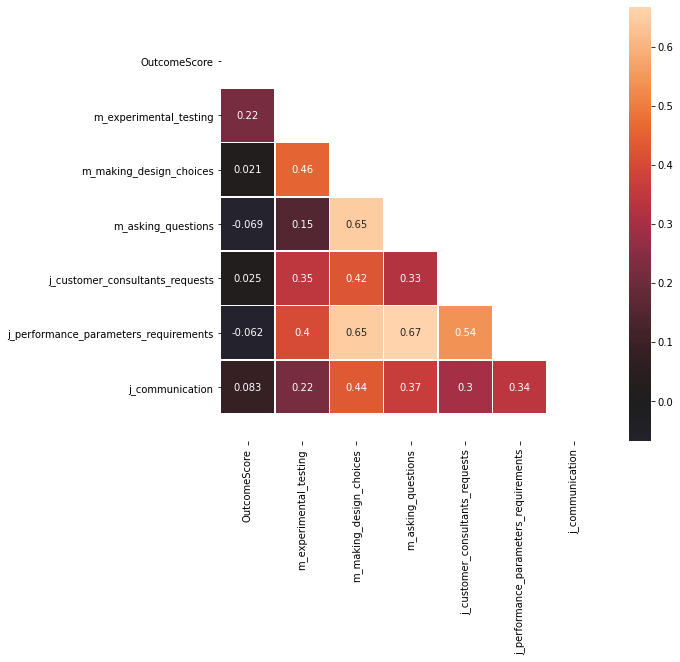

In [42]:
corrs = group2tag.drop('userIDs', axis=1).corr() 

mask = np.triu(np.ones_like(corrs, dtype=np.bool)) 
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corrs, mask=mask, center=0, annot=True, square=True, linewidths=.5) 
bottom, top = ax.get_ylim() 
ax.set_ylim(bottom + 0.5, top - 0.5);